In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [12]:
data = pd.read_csv('./data/dieta-clean.csv')

In [32]:
data = data[['estado','edad','time','peso total','hcrop']].dropna()

In [36]:
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time
data['period'] = data['time'].apply(lambda x: 'M' if x < pd.to_datetime('13:00:00').time() else 'V')

In [38]:
data = data[['estado','edad','period','peso total','hcrop']]

In [39]:
data

,estado,edad,period,peso total,hcrop
0,NM,J,V,9.7584,0.000000
1,NM,J,V,3.9632,0.000000
2,AZ,A,V,5.4562,0.785803
3,NM,J,V,4.4976,0.464732
4,AZ,J,V,5.4630,1.680150
...,...,...,...,...,...
314,NM,A,V,0.3501,0.112925
315,NM,J,M,0.1977,0.000000
316,NM,J,V,2.6084,0.065394
317,NM,A,V,7.3265,0.000000


Distribución del peso en el buche de las aves

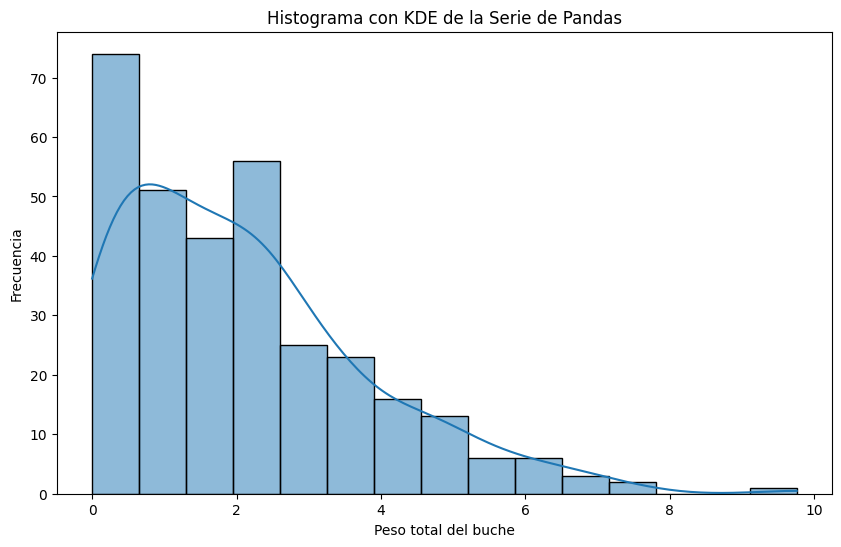

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['peso total'], kde=True)
plt.title('Histograma con KDE del peso total del buche')
plt.xlabel('Peso total del buche')
plt.ylabel('Frecuencia')
plt.show()

Ahora se prueba la distribución del log del peso total del buche

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


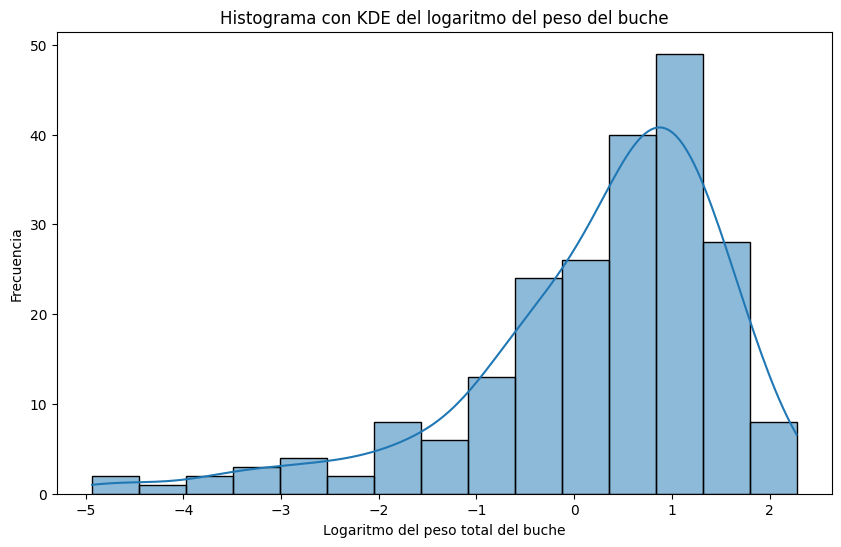

In [75]:
logdata_peso = np.log(data['peso total'])
logdata_peso = logdata_peso.replace(float('-inf'), pd.NA).dropna()
plt.figure(figsize=(10, 6))
sns.histplot(logdata_peso, kde=True)
plt.title('Histograma con KDE del logaritmo del peso del buche')
plt.xlabel('Logaritmo del peso total del buche')
plt.ylabel('Frecuencia')
plt.show()

Parece ser normal con un con sesgo hacia la izquierda, se procede a hacer pruebas de normalidad para el log

In [96]:
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(logdata_peso)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0")
else:
    print("se rechaza H0")

Shapiro-Wilk Test: Estadístico=0.8797469617716118, p-valor=4.44332841013825e-12
se rechaza H0


Hay evidencia para rechazar que la muestra del peso del buche venga de una distribución lognormal.

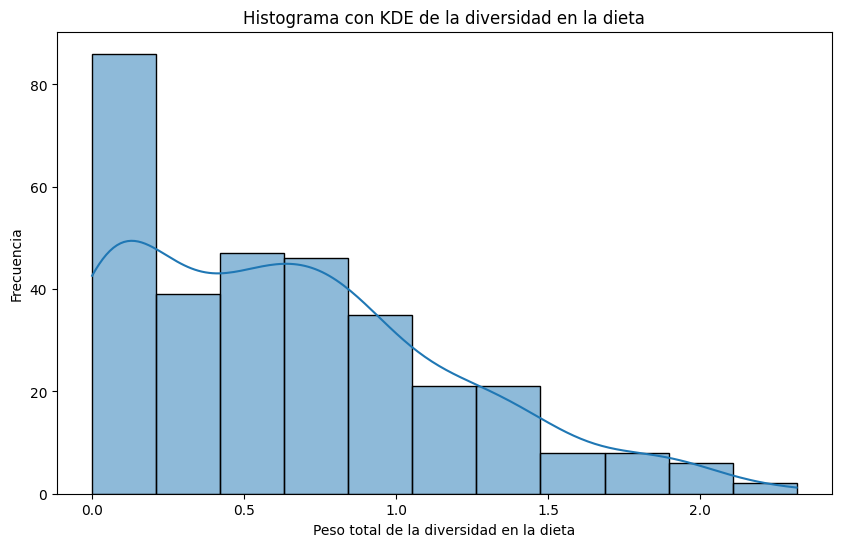

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['hcrop'], kde=True)
plt.title('Histograma con KDE de la diversidad en la dieta')
plt.xlabel('Peso total de la diversidad en la dieta')
plt.ylabel('Frecuencia')
plt.show()

Se probará nuevamente con el log de la variable

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


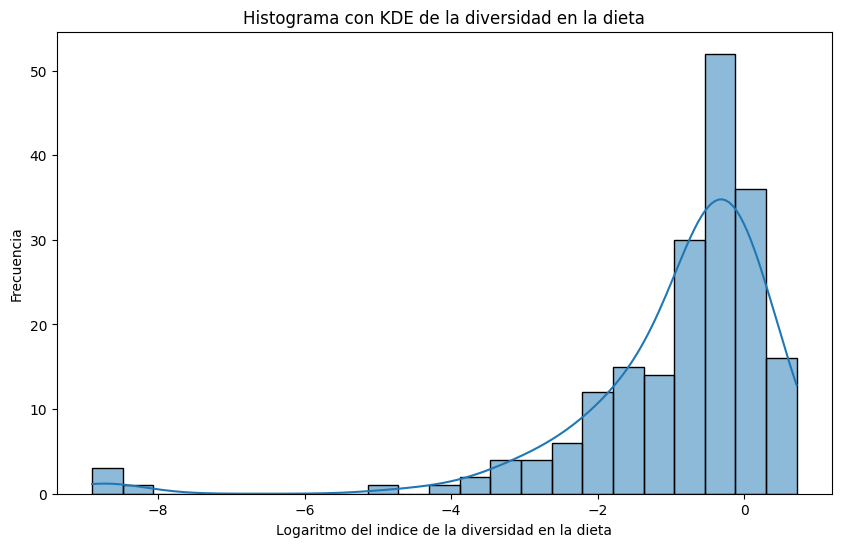

In [92]:
logdata_hcrop = np.log(data['hcrop'])
logdata_hcrop = logdata_hcrop.replace(float('-inf'), pd.NA).dropna()
plt.figure(figsize=(10, 6))
sns.histplot(logdata_hcrop, kde=True)
plt.title('Histograma con KDE de la diversidad en la dieta')
plt.xlabel('Logaritmo del indice de la diversidad en la dieta')
plt.ylabel('Frecuencia')
plt.show()

Parece suceder lo mismo que con el peso

In [95]:
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(logdata_hcrop)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0")
else:
    print("se rechaza H0")

Shapiro-Wilk Test: Estadístico=0.7056347411986446, p-valor=2.2472432476021902e-18
se rechaza H0


Hay evidencia para rechazar la hipotesis de que la muestra de la diversidad de la dieta viene de una distribución lognormal.